In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

The original dataset had over 500+ columns of which most they had calculated themselves. We decided as a group to only use the original data pieces then get other information from them that we may need. This is also because a dataset with 500+ would have not worked on most of our computers and caused more issues with missing values down the line. 

In [2]:
master_dataframe = pd.read_csv('data/masterdataframe.csv')
master_dataframe_b = master_dataframe[["date","fight_url", "event_url", "result", "fighter", "opponent", "division", "stance", "dob", "method", "total_comp_time", "round", "time",
                                        "fighter_url", "opponent_url", "referee", "time_format", "reach", "height", "age", "knockdowns", "sub_attempts", "reversals", "control", 
                                         "takedowns_landed", "takedowns_attempts", "sig_strikes_landed", "sig_strikes_attempts", "total_strikes_landed", "total_strikes_attempts", 
                                         "head_strikes_landed", "head_strikes_attempts", "body_strikes_landed", "body_strikes_attempts", "leg_strikes_landed", "leg_strikes_attempts",
                                         "distance_strikes_landed", "distance_strikes_attempts", "clinch_strikes_landed", "clinch_strikes_attempts", "ground_strikes_landed", 
                                         "ground_strikes_attempts"]]
display(master_dataframe_b.head())
print("Shape of Master Dataframe:", master_dataframe_b.shape)
master_dataframe_b.info()

,date,fight_url,event_url,result,fighter,opponent,division,stance,dob,method,...,body_strikes_landed,body_strikes_attempts,leg_strikes_landed,leg_strikes_attempts,distance_strikes_landed,distance_strikes_attempts,clinch_strikes_landed,clinch_strikes_attempts,ground_strikes_landed,ground_strikes_attempts
0,3/11/1994,http://ufcstats.com/fight-details/4acab67848e7...,http://ufcstats.com/event-details/a6a9ab5a824e...,0,Sean Daugherty,Scott Morris,Open Weight,NaN,12/4/1975,SUB,...,0,0,0,2,0,3,0,1,0,0
1,3/11/1994,http://ufcstats.com/fight-details/4acab67848e7...,http://ufcstats.com/event-details/a6a9ab5a824e...,1,Scott Morris,Sean Daugherty,Open Weight,Orthodox,NaN,SUB,...,0,0,0,0,0,0,1,1,0,0
2,3/11/1994,http://ufcstats.com/fight-details/4b9ae533ccb3...,http://ufcstats.com/event-details/a6a9ab5a824e...,0,Ray Wizard,Patrick Smith,Open Weight,NaN,NaN,SUB,...,0,0,1,1,1,1,0,0,0,0
3,3/11/1994,http://ufcstats.com/fight-details/4b9ae533ccb3...,http://ufcstats.com/event-details/a6a9ab5a824e...,1,Patrick Smith,Ray Wizard,Open Weight,Orthodox,8/28/1963,SUB,...,1,1,0,0,0,0,1,1,0,0
4,3/11/1994,http://ufcstats.com/fight-details/ccee020be2e8...,http://ufcstats.com/event-details/a6a9ab5a824e...,0,David Levicki,Johnny Rhodes,Open Weight,NaN,NaN,KO/TKO,...,0,0,0,0,1,2,2,2,1,1


Shape of Master Dataframe: (13322, 42)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13322 entries, 0 to 13321
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       13322 non-null  object 
 1   fight_url                  13322 non-null  object 
 2   event_url                  13322 non-null  object 
 3   result                     13322 non-null  int64  
 4   fighter                    13322 non-null  object 
 5   opponent                   13322 non-null  object 
 6   division                   13322 non-null  object 
 7   stance                     13226 non-null  object 
 8   dob                        13087 non-null  object 
 9   method                     13322 non-null  object 
 10  total_comp_time            13322 non-null  int64  
 11  round                      13322 non-null  int64  
 12  time                       13322 non-null  object 
 13  fighter

### Analyzing outliers in columns 'knockdowns', 'total_strikes_landed', 'control', 'sub_attempts'

In [3]:


# Columns to analyze
columns_to_analyze = ['knockdowns', 'total_strikes_landed', 'control', 'sub_attempts']

# Calculate IQR for outlier detection
outlier_summary = {}

for col in columns_to_analyze:
    Q1 = master_dataframe_b[col].quantile(0.25)
    Q3 = master_dataframe_b[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = master_dataframe_b[(master_dataframe_b[col] < lower_bound) | (master_dataframe_b[col] > upper_bound)]
    outlier_summary[col] = {
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'outliers': outliers
    }
    print(f"Column: {col}")
    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    print(f"Number of Outliers: {len(outliers)}\n")

# Collect all outliers into one DataFrame for review
all_outliers = pd.concat([outlier_summary[col]['outliers'] for col in columns_to_analyze]).drop_duplicates()
print("Summary of Outliers Across Selected Columns")
display(all_outliers)

Column: knockdowns
Lower Bound: 0.0, Upper Bound: 0.0
Number of Outliers: 2449

Column: total_strikes_landed
Lower Bound: -70.5, Upper Bound: 165.5
Number of Outliers: 276

Column: control
Lower Bound: -280.0, Upper Bound: 480.0
Number of Outliers: 796

Column: sub_attempts
Lower Bound: -1.5, Upper Bound: 2.5
Number of Outliers: 453

Summary of Outliers Across Selected Columns


,date,fight_url,event_url,result,fighter,opponent,division,stance,dob,method,...,body_strikes_landed,body_strikes_attempts,leg_strikes_landed,leg_strikes_attempts,distance_strikes_landed,distance_strikes_attempts,clinch_strikes_landed,clinch_strikes_attempts,ground_strikes_landed,ground_strikes_attempts
19,3/11/1994,http://ufcstats.com/fight-details/b72acedda7dd...,http://ufcstats.com/event-details/a6a9ab5a824e...,1,Johnny Rhodes,Fred Ettish,Open Weight,Orthodox,NaN,SUB,...,0,0,1,1,3,6,1,2,9,21
31,9/9/1994,http://ufcstats.com/fight-details/8887948f0c09...,http://ufcstats.com/event-details/1a49e0670dfa...,1,Keith Hackney,Emmanuel Yarborough,Open Weight,Sideways,NaN,KO/TKO,...,0,0,5,5,6,8,2,3,26,39
35,9/9/1994,http://ufcstats.com/fight-details/ca837b002a31...,http://ufcstats.com/event-details/1a49e0670dfa...,1,Harold Howard,Roland Payne,Open Weight,Orthodox,NaN,KO/TKO,...,0,0,0,0,1,4,4,4,4,4
42,12/16/1994,http://ufcstats.com/fight-details/8f8f47a728c3...,http://ufcstats.com/event-details/b60391da771d...,0,Jason Fairn,Guy Mezger,Open Weight,NaN,NaN,KO/TKO,...,2,2,2,2,1,4,4,4,4,4
61,4/7/1995,http://ufcstats.com/fight-details/fa152ada833d...,http://ufcstats.com/event-details/dedc3bb440d0...,1,Guy Mezger,John Dowdy,Open Weight,Orthodox,1/1/1968,KO/TKO,...,1,1,1,1,2,5,2,2,8,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13071,4/9/2022,http://ufcstats.com/fight-details/d8945e21a63e...,http://ufcstats.com/event-details/3a97fda0de6f...,1,Mackenzie Dern,Tecia Torres,Women's Strawweight,Orthodox,3/24/1993,S-DEC,...,6,7,2,2,46,152,3,3,1,1
13111,4/23/2022,http://ufcstats.com/fight-details/e4d946470fd1...,http://ufcstats.com/event-details/236a37d96d47...,1,Preston Parsons,Evan Elder,Welterweight,Orthodox,7/15/1995,U-DEC,...,9,11,6,7,33,58,7,11,35,43
13203,5/21/2022,http://ufcstats.com/fight-details/5136dc566f46...,http://ufcstats.com/event-details/a6c32678efd4...,1,Chase Hooper,Felipe Colares,Featherweight,Southpaw,9/13/1999,KO/TKO,...,3,5,0,0,11,28,10,18,39,47
13235,6/4/2022,http://ufcstats.com/fight-details/e5e75d831670...,http://ufcstats.com/event-details/57591bbf1623...,1,Joe Solecki,Alex Da Silva,Lightweight,Orthodox,8/27/1993,M-DEC,...,0,0,1,1,30,77,1,3,2,2


General Observations
The analysis identified several outliers across key fight metrics. Knockdowns had the highest number of outliers (2,449), reflecting their rarity but significant impact when they occur. Total strikes landed (273 outliers) highlighted high-volume striking performances, while control time (796 outliers) indicated grappling dominance in certain fights. Submission attempts had 453 outliers, pointing to aggressive submission strategies. The combined outlier dataset offers a rich view of extreme performances across fights, which can be further explored for patterns related to fighting styles, divisions, and outcomes.

Column-Specific Analysis
Knockdowns:
Knockdowns had 2,449 outliers, most of which are non-zero since the majority of fights do not feature knockdowns. These outliers indicate rare instances of dominant striking performances where fighters likely secured decisive victories or forced stoppages. Fighters with multiple knockdowns in a fight often demonstrate significant striking power and control over their opponents, making these matches unique in the dataset.

Total Strikes Landed:
Outliers in total strikes landed represent fights where more than 165.5 strikes were landed, with 273 such occurrences identified. These fights likely reflect high-paced, high-volume striking performances where fighters overwhelmed their opponents with consistent offense. These outliers may be more common in lighter weight divisions, where the faster pace of fights allows for a greater number of strikes.

Control Time:
Control time outliers, defined as exceeding 480 seconds (8 minutes), were found in 796 fights, indicating prolonged grappling dominance. These fights suggest that wrestlers or jiu-jitsu specialists were able to neutralize their opponents for significant portions of the match. Such performances often correlate with decision victories, where control time is a key factor in determining the winner.

Submission Attempts:
Fights with more than 2.5 submission attempts were flagged as outliers, with 453 such cases observed. These fights showcase fighters who rely heavily on aggressive grappling and submission strategies, often associated with Brazilian Jiu-Jitsu specialists. High submission attempts may indicate a fighter's focus on quick finishes, though they do not always guarantee victory if unsuccessful.

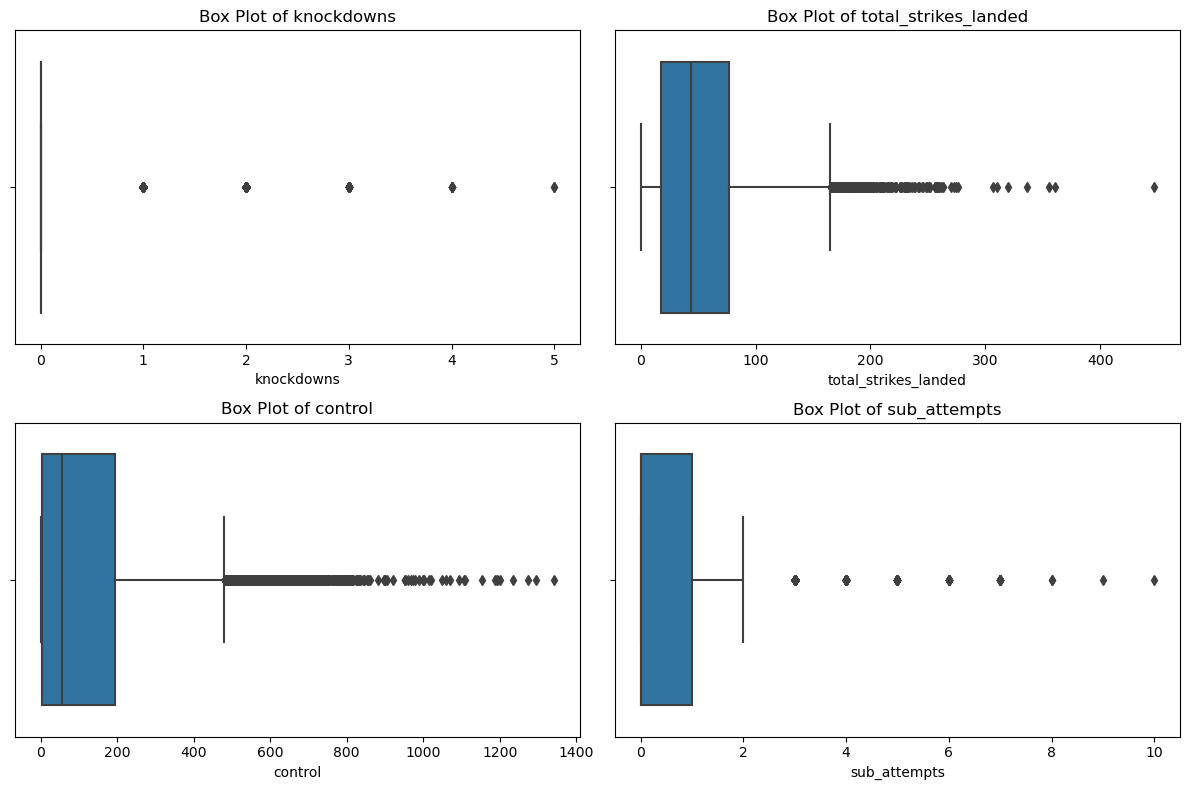

In [4]:

# Box plots for selected columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(columns_to_analyze):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=master_dataframe_b[col])
    plt.title(f"Box Plot of {col}")
plt.tight_layout()
plt.show()

Correlation Between Selected Columns in Outliers:


,knockdowns,total_strikes_landed,control,sub_attempts
knockdowns,1.000000,-0.345860,-0.531609,-0.384980
total_strikes_landed,-0.345860,1.000000,0.533672,0.030134
control,-0.531609,0.533672,1.000000,0.149519
sub_attempts,-0.384980,0.030134,0.149519,1.000000


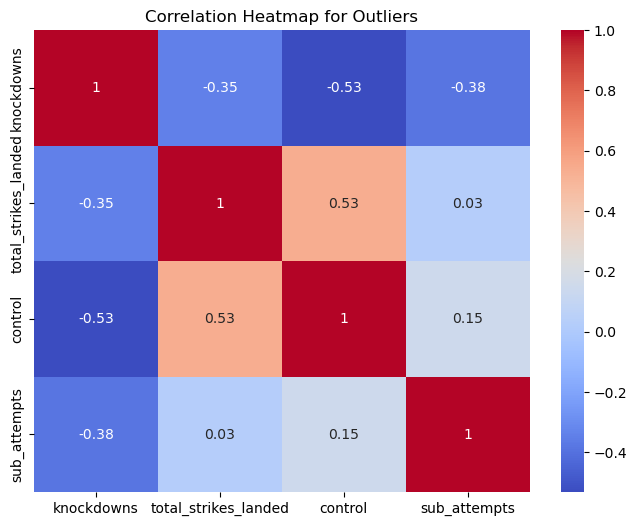

In [5]:
# Correlation analysis for outlier data
correlation_data = all_outliers[columns_to_analyze].corr()
print("Correlation Between Selected Columns in Outliers:")
display(correlation_data)

# Heatmap for correlation visualization
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap for Outliers")
plt.show()

Key Takeaways
- The correlations highlight the separation between striking-focused and grappling-focused fighting styles.

- Knockdowns are inversely related to both control and submission attempts, showing that knockout artists rely on striking rather than ground control or submissions.

- Total strikes landed correlates positively with control, suggesting that fighters who dominate on the ground also generate high striking volume, often through ground-and-pound.

- Submission attempts have weak correlations with other metrics, reflecting that submission-focused fighters may prioritize positional control but are distinct in their approach compared to strikers or volume-based grapplers.


In [6]:
# Investigate outliers for 'control' time
control_outliers = outlier_summary['control']['outliers']
print("Outliers for Control Time:")
display(control_outliers[['fighter', 'opponent', 'method', 'control', 'total_comp_time', 'division']])

Outliers for Control Time:


,fighter,opponent,method,control,total_comp_time,division
388,Ron Waterman,Tim Lajcik,DRAW,514,900,Heavyweight
390,Tito Ortiz,Frank Shamrock,KO/TKO,951,1182,Middleweight
395,Kenichi Yamamoto,Daiju Takase,U-DEC,856,900,Open Weight
400,Katsuhisa Fujii,Kenichi Yamamoto,SUB,528,555,Open Weight
405,Kevin Randleman,Pete Williams,U-DEC,1060,1500,Heavyweight
...,...,...,...,...,...,...
13233,Damon Jackson,Dan Argueta,U-DEC,625,900,Featherweight
13268,Taila Santos,Valentina Shevchenko,S-DEC,529,1500,Women's Flyweight
13270,Glover Teixeira,Jiri Prochazka,SUB,587,1472,Light Heavyweight
13313,Umar Nurmagomedov,Nate Maness,U-DEC,649,900,Bantamweight


In [7]:
# Group by division and calculate average control time and count of outliers
control_by_division = control_outliers.groupby('division')['control'].agg(['count', 'mean', 'max']).reset_index()
control_by_division = control_by_division.sort_values(by='mean', ascending=False)

print("Summary of Control Time Outliers by Division:")
display(control_by_division)

Summary of Control Time Outliers by Division:


,division,count,mean,max
8,Open Weight,2,692.000000,856
5,Light Heavyweight,75,645.200000,1294
4,Heavyweight,58,643.000000,1192
9,Welterweight,173,642.832370,1234
3,Flyweight,31,637.612903,1069
7,Middleweight,99,632.505051,1201
6,Lightweight,144,627.243056,1342
13,Women's Strawweight,27,618.074074,1001
10,Women's Bantamweight,23,613.913043,1110
2,Featherweight,77,600.233766,968


The analysis of control time outliers by division reveals that Light Heavyweight and Heavyweight divisions have the highest average control times, with averages of 645.2 and 643 seconds, respectively, indicating strong grappling dominance among fighters in these weight classes. Welterweight has the most control-heavy fights overall with 173 outliers, suggesting a high frequency of grappling-focused performances in this division. Notably, lighter divisions like Flyweight and Women’s Strawweight also show significant averages, reflecting technical grappling in faster-paced fights. The Open Weight category has the highest maximum control time (856 seconds), but it has far fewer fights compared to other divisions.

In [8]:
# Calculate IQR for the age column
Q1 = master_dataframe_b["age"].quantile(0.25)
Q3 = master_dataframe_b["age"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify age outliers
age_outliers = master_dataframe_b[(master_dataframe_b["age"] < lower_bound) | (master_dataframe_b["age"] > upper_bound)]

# Remove duplicates based on the 'fighter' column
unique_age_outliers = age_outliers.drop_duplicates(subset='fighter')

# Remove fighters with missing critical data
filtered_age_outliers = unique_age_outliers.dropna(subset=["result", "division", "method"])

fighter_match_counts = master_dataframe_b["fighter"].value_counts()

# Filter for fighters with more than one match
relevant_fighters = fighter_match_counts[fighter_match_counts > 1].index
filtered_age_outliers = filtered_age_outliers[filtered_age_outliers["fighter"].isin(relevant_fighters)]

fighter_match_counts = master_dataframe_b["fighter"].value_counts()

# Summary statistics for the filtered dataset
summary = filtered_age_outliers.groupby("fighter").agg({
    "age": "mean",  # Average age
    "result": "mean",  # Win rate (1 = win, 0 = loss)
    "division": "nunique",  # Number of divisions fought in
    "method": "nunique"  # Number of methods of victory/loss
}).reset_index()

# Add the match count column
summary["matches"] = summary["fighter"].map(fighter_match_counts)
summary.rename(columns={"result": "win_rate", "division": "divisions", "method": "methods"}, inplace=True)
summary["win_rate"] *= 100  # Convert win rate to percentage

print("Summary of Refined Age Outliers with Match Count:")
display(summary)

Summary of Refined Age Outliers with Match Count:


,fighter,age,win_rate,divisions,methods,matches
0,Andre Roberts,57.0,0.0,1,1,2
1,Bas Rutten,57.0,100.0,1,1,2
2,Brad Kohler,58.0,0.0,1,1,2
3,Dan Severn,64.0,100.0,1,1,13
4,Don Frye,56.0,100.0,1,1,10
5,Eugene Jackson,55.0,100.0,1,1,7
6,Gary Goodridge,56.0,100.0,1,1,8
7,Gil Castillo,56.0,0.0,1,1,3
8,Guy Mezger,54.0,100.0,1,1,5
9,Ian Freeman,55.0,0.0,1,1,6


The analysis of age outliers in MMA highlights 30 fighters aged 54 and above, showcasing varying levels of success. Many, such as Randy Couture and Dan Severn, maintained high win rates (100%) despite competing in numerous matches (24 and 11, respectively), indicating that experience and skill significantly contribute to success at advanced ages. In contrast, fighters with fewer matches, like Andre Roberts and Paul Jones, had lower win rates, suggesting that prolonged experience may play a key role in overcoming the challenges of aging in MMA. The dataset also shows that older fighters tend to specialize in a single division and rely on specific methods, emphasizing a focus on their strengths rather than diversification. Legendary fighters such as Ken Shamrock, Royce Gracie, and Mark Coleman stand out, demonstrating that even as age outliers, their technique, adaptability, and reputation enabled them to remain competitive in the sport. This underscores the importance of skill and strategy in maintaining success as an older fighter.